In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
data <- as_tibble(read.csv('../../data/interim/reshaped_dataset.csv'))

In [3]:
head(data)

Nom.plante,Hauteur,Nbr.taille,Poids.frais,Poids.sec,I
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,68.625,7.25,14.250,2.76650,False
5,75.375,3.25,11.250,2.30675,False
8,88.750,4.50,16.000,3.40350,False
9,79.500,3.75,9.875,1.90725,False
13,83.375,4.00,14.250,2.94650,False
16,90.875,4.50,16.125,3.44700,False


In [4]:
colnames(data)

[1] "Nom.plante"  "Hauteur"     "Nbr.taille"  "Poids.frais" "Poids.sec"  
[6] "I"

In [5]:
data[data$I == "False", ]$I <- 'FALSE'
data[data$I == "True", ]$I <- 'TRUE'

In [6]:
data$I <- as.logical(data$I)

In [7]:
sapply(data, typeof)

Nom.plante     Hauteur  Nbr.taille Poids.frais   Poids.sec           I 
"character"    "double"    "double"    "double"    "double"   "logical"

## Analyse des hauteurs

**Est-ce que l'inoculation a un effet ?**
   * Distribution normale?
   * Homogénéité des variances?

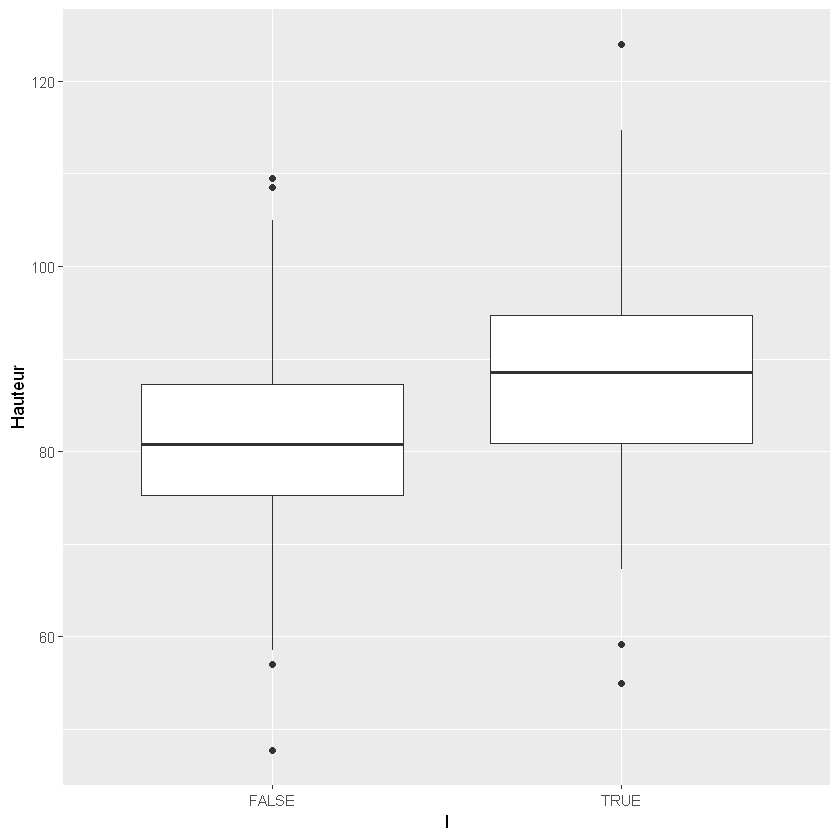

In [8]:
ggplot(data) + geom_boxplot(aes(y= Hauteur, x=I))

Il semble que les moyennes soit différentes en fonction de l'inoculation

### Test de normalité

H$_0$ l'échantillon provient d'une distribution normale

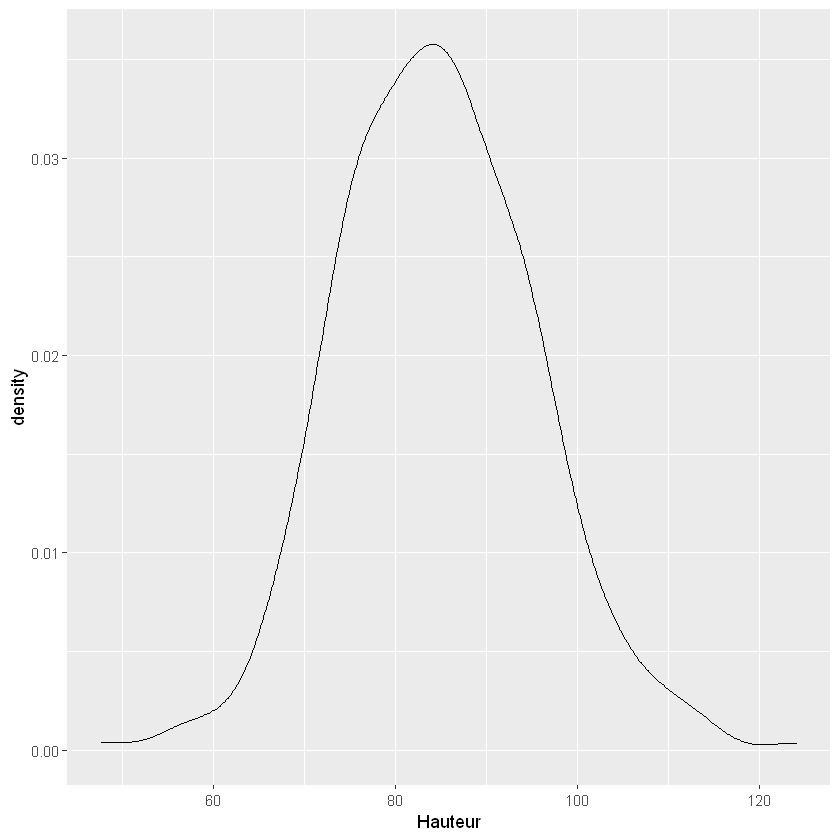

In [9]:
ggplot(data) + geom_density(kernel='gaussian', aes(x=Hauteur))

In [10]:
shapiro.test(data$Hauteur)


	Shapiro-Wilk normality test

data:  data$Hauteur
W = 0.99537, p-value = 0.3246


p-value > $\alpha$ (0,05) $\rightarrow$ H$_0$ ne peut pas être rejeté

La distribution semble issue d'une distribution normale

### Homogénéité des variances

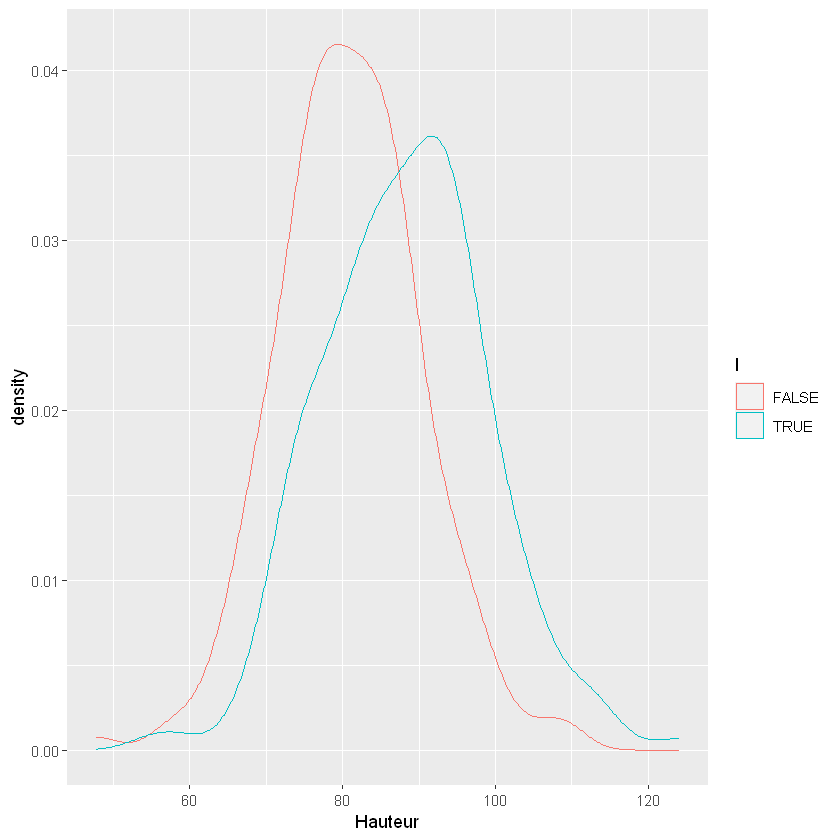

In [11]:
ggplot(data, aes(x=Hauteur, color=I)) + geom_density(kernel='gaussian')

In [12]:
bartlett.test(Hauteur ~ I, data=data)


	Bartlett test of homogeneity of variances

data:  Hauteur by I
Bartlett's K-squared = 3.2198, df = 1, p-value = 0.07275


### Les moyennes sont-elles différentes?

In [13]:
t.test(Hauteur ~ I, data=data)


	Welch Two Sample t-test

data:  Hauteur by I
t = -6.9729, df = 369.71, p-value = 1.437e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.323648 -5.221766
sample estimates:
mean in group FALSE  mean in group TRUE 
           80.94599            88.21869 


## Analyse des poids sec

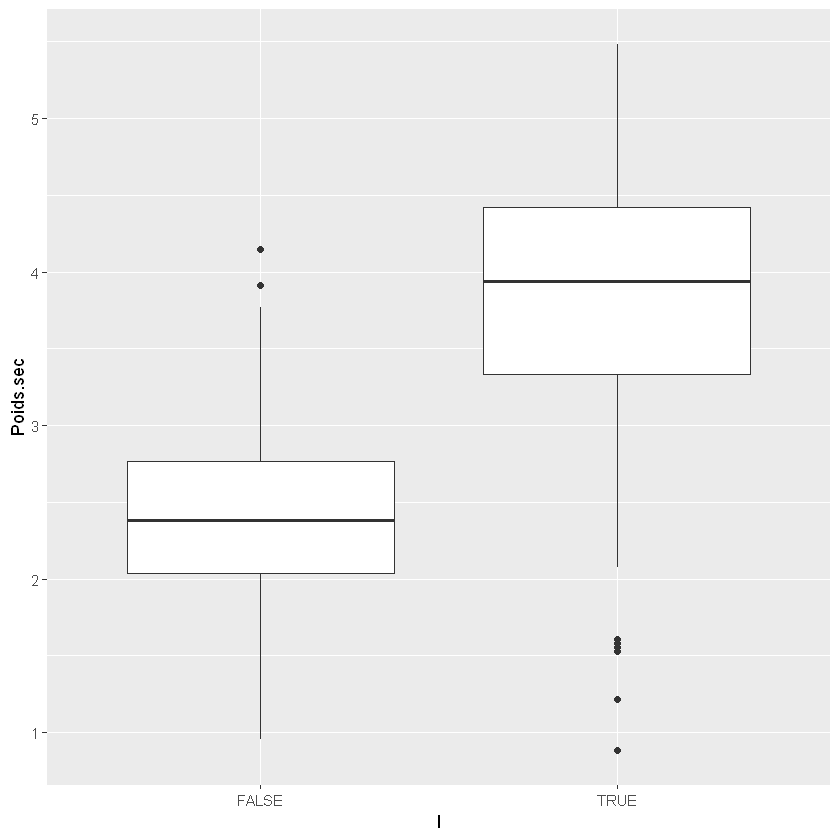

In [14]:
ggplot(data) + geom_boxplot(aes(y= Poids.sec, x=I))

Les distributions semblent contenir des outliers

In [15]:
I = data[ which(data$I == TRUE), ]
NI = data[ which(data$I == FALSE), ]

In [16]:
Q_I <- quantile(I$Poids.sec, probs=c(.25, .75))
Q_I

25%      75% 
3.333667 4.423667

In [17]:
iqr_I <- IQR(I$Poids.sec)
iqr_I

[1] 1.09

In [18]:
up_I = Q_I[2] + 1.5 * iqr_I
low_I = Q_I[1] - 1.5 * iqr_I
up_I
low_I

75% 
6.058667

25% 
1.698667

In [19]:
Q_NI <- quantile(NI$Poids.sec, probs=c(.25, .75))
Q_NI

25%     75% 
2.03675 2.76425

In [20]:
iqr_NI <- IQR(NI$Poids.sec)
iqr_NI

[1] 0.7275

In [21]:
up_NI = Q_NI[2] + 1.5 * iqr_NI
low_NI = Q_NI[1] - 1.5 * iqr_NI
up_NI
low_NI

75% 
3.8555

25% 
0.9455

In [22]:
I_NO <- subset(I, Poids.sec > low_I & Poids.sec < up_I)

In [23]:
NI_NO <- subset(NI, Poids.sec > low_NI & Poids.sec < up_NI)

In [24]:
data_NO <- rbind(NI_NO, I_NO)

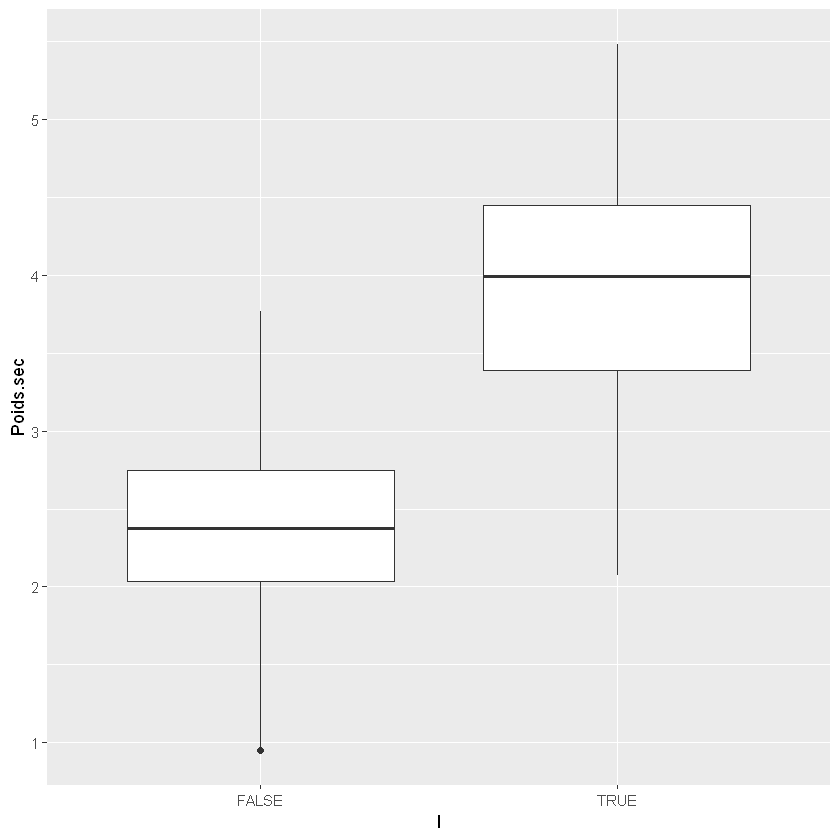

In [25]:
ggplot(data_NO) + geom_boxplot(aes(y= Poids.sec, x=I))

### Test de normalité

H$_0$ l'échantillon provient d'une distribution normale

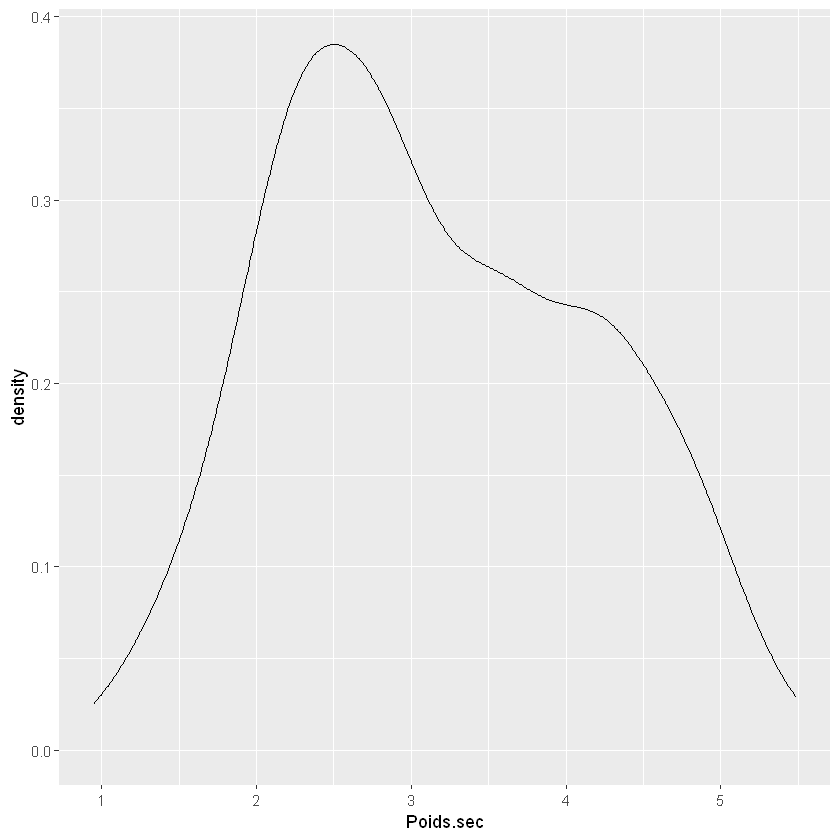

In [26]:
ggplot(data_NO) + geom_density(kernel='gaussian', aes(x=Poids.sec))

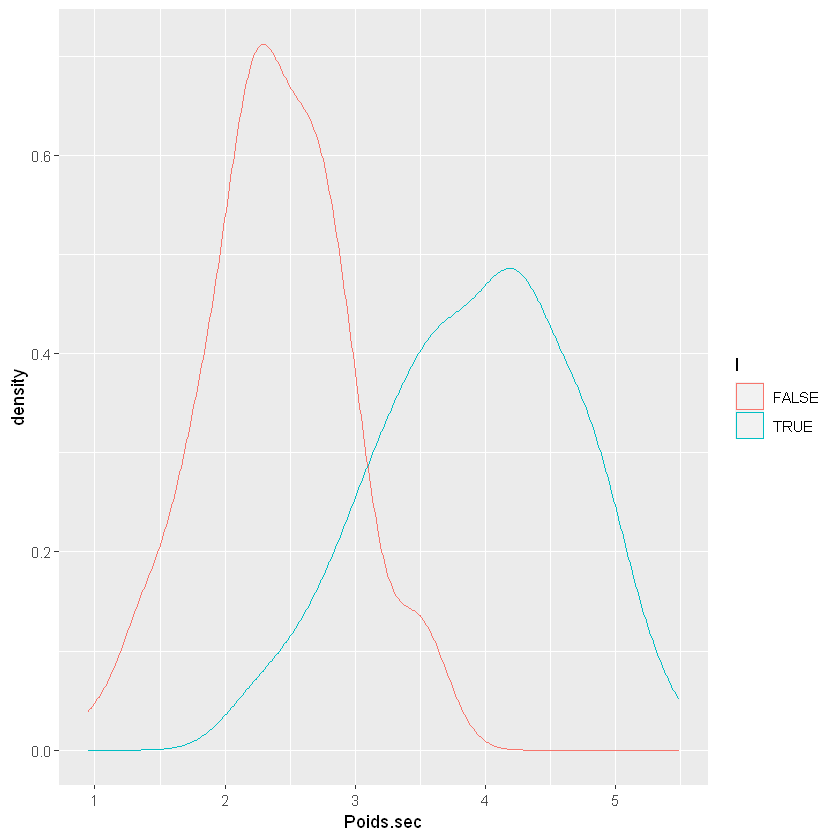

In [27]:
ggplot(data_NO, aes(x=Poids.sec, color=I)) + geom_density(kernel='gaussian')

In [28]:
shapiro.test(data_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  data_NO$Poids.sec
W = 0.97537, p-value = 6.127e-06


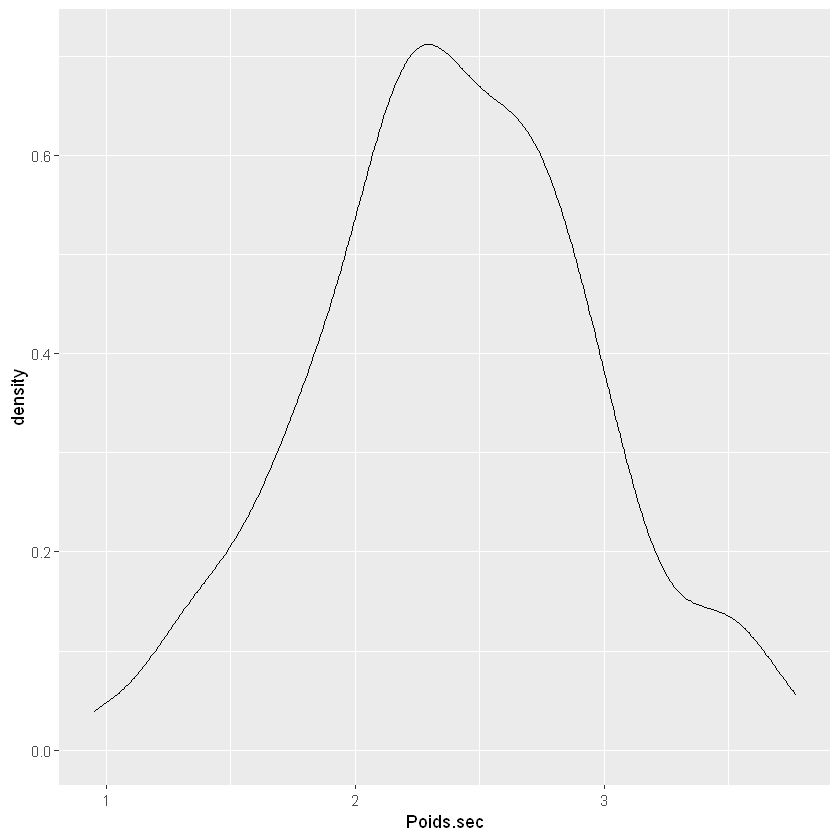

In [29]:
ggplot(NI_NO) + geom_density(kernel='gaussian', aes(x = Poids.sec))

In [30]:
shapiro.test(NI_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  NI_NO$Poids.sec
W = 0.99479, p-value = 0.762


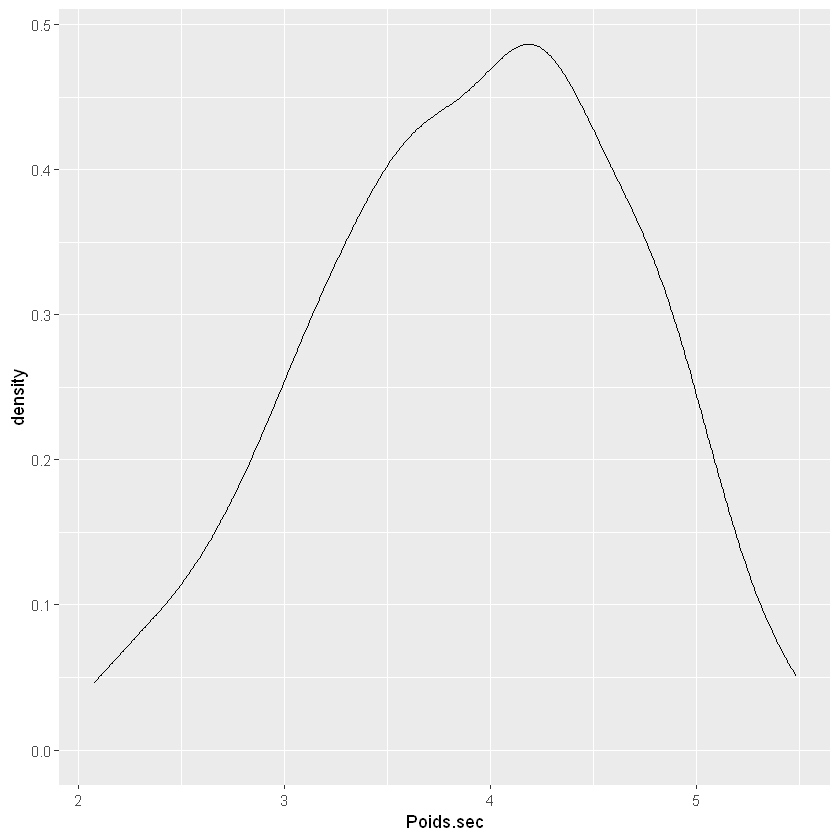

In [31]:
ggplot(I_NO) + geom_density(kernel='gaussian', aes(x = Poids.sec))

In [32]:
shapiro.test(I_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  I_NO$Poids.sec
W = 0.98648, p-value = 0.07635


### Homogénéité des variances

In [33]:
bartlett.test(Poids.sec ~ I, data=data)


	Bartlett test of homogeneity of variances

data:  Poids.sec by I
Bartlett's K-squared = 28.047, df = 1, p-value = 1.184e-07


### Les moyennes sont-elles différentes?

In [34]:
t.test(Poids.sec ~ I, data=data_NO)


	Welch Two Sample t-test

data:  Poids.sec by I
t = -22.406, df = 337.28, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.66401 -1.39542
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.387802            3.917517 
